## import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## 1) Absolute vs Relative Frequency

#### Absolute Frequency

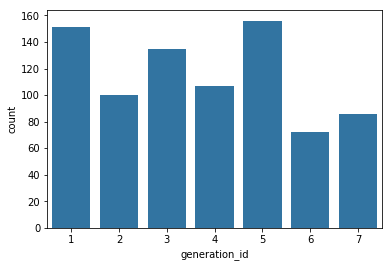

In [7]:
pokemon = pd.read_csv('./pokemon.csv')

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

#### Relative Frequency

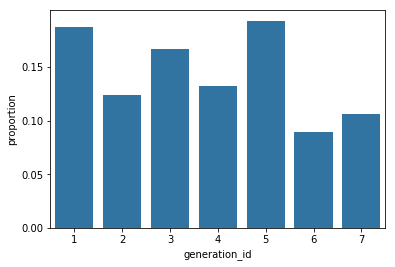

In [14]:
# get proportion taken by most common group for derivation of tick marks
n_points = pokemon.shape[0]
max_count = pokemon['generation_id'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

#### Additional Variation - use text annotation

In [32]:
labels[0], labels[1], labels[2]

(Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'))

0 Text(0, 0, '1')
1 Text(0, 0, '2')
2 Text(0, 0, '3')
3 Text(0, 0, '4')
4 Text(0, 0, '5')
5 Text(0, 0, '6')
6 Text(0, 0, '7')


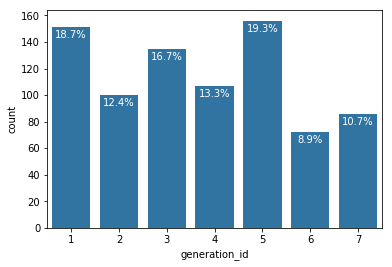

In [30]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

# add annotations
id_counts = pokemon['generation_id'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    print(loc, label)
    # get the text property for the label to get the correct count
    count = id_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

#### Additional Variation - ordered horizontal bar chart 

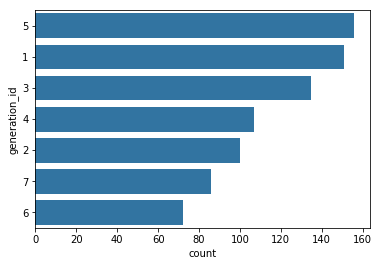

In [37]:
ordered_index = pokemon.generation_id.value_counts().index

sb.countplot(data = pokemon, y = 'generation_id', color = base_color, order = ordered_index);

## 2) Histogram & Subplot

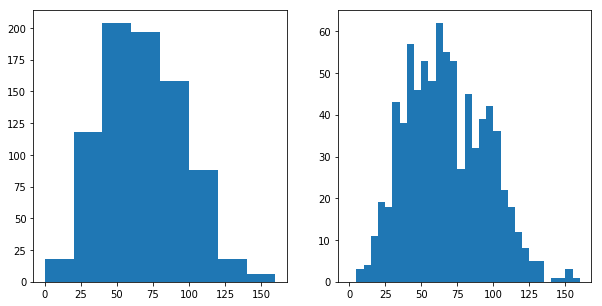

In [52]:
plt.figure(figsize = [10, 5])

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+20, 20)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

## Scales & Transformations

#### Original height plot

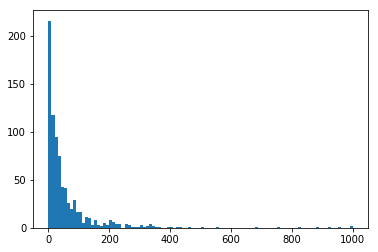

In [67]:
bins = np.arange(0, pokemon['weight'].max()+10, 10)
plt.hist(data = pokemon, x = 'weight', bins = bins);

In [68]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [70]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

#### Scales and Transformations
It makes the original plot shape to the normal distribution shape

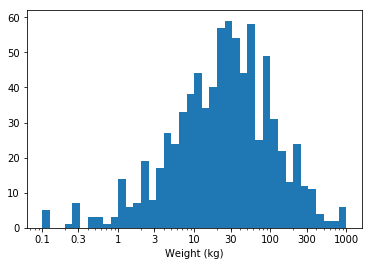

In [58]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1) # because -1 is min, 2.999 is max value
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)');